**24BAD128**\
**EXP 5 – SCENARIO 1 (Breast Cancer Classification using KNN)**

**Explanation:**

1. The program loads the breast cancer dataset.

2. Dataset details and missing values are checked.

3. The id column is removed since it is not useful for prediction.

4. Diagnosis column is converted into numbers using LabelEncoder:

    Benign → 0

    Malignant → 1

**Features Used:**

1. radius_mean

2. texture_mean

3. perimeter_mean

4. area_mean

5. smoothness_mean

**Steps Performed:**

1. Features are scaled using StandardScaler.

2. Data split into training (80%) and testing (20%).

3. K-Nearest Neighbors (KNN) model trained with K=5.

4. Predictions made on test data.

**Evaluation:**

1. Accuracy score

2. Classification report

3. Number of misclassified samples

**Visualizations:**

1. Confusion Matrix: shows prediction correctness.

2. Accuracy vs K Graph: finds best K value.

3. Decision Boundary Plot: shows how KNN separates classes.

24BAD128-Exp 5-Scenario 1

First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst 

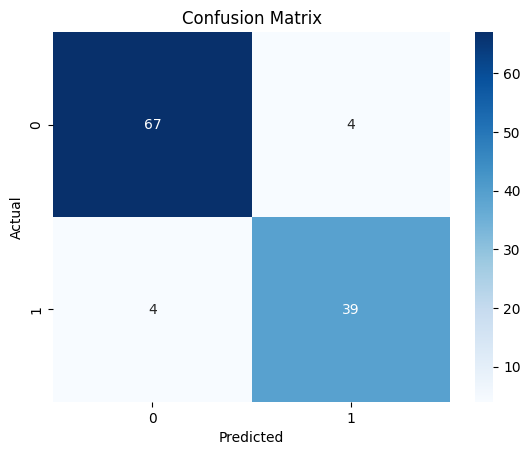

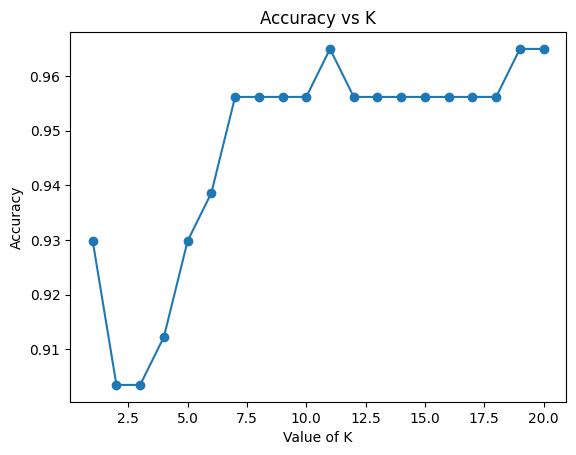

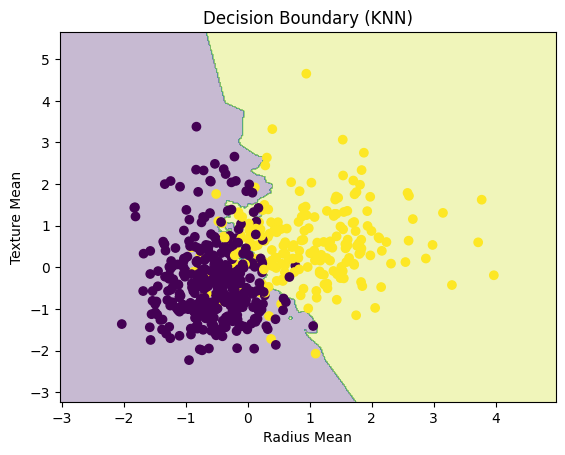

In [2]:
#from google.colab import files
#uploaded=files.upload()

# 24BAD128-Exp 5-Scenario 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("24BAD128-Exp 5-Scenario 1")

df = pd.read_csv(r"breast-cancer.csv")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean']]

y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

misclassified = np.where(y_test != y_pred)
print("\nNumber of Misclassified Samples:", len(misclassified[0]))

k_values = range(1, 21)
accuracy_list = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure()
plt.plot(k_values, accuracy_list, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

X2 = df[['radius_mean', 'texture_mean']]
y2 = df['diagnosis']

X2_scaled = scaler.fit_transform(X2)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_scaled, y2)

x_min, x_max = X2_scaled[:,0].min()-1, X2_scaled[:,0].max()+1
y_min, y_max = X2_scaled[:,1].min()-1, X2_scaled[:,1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y2)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Decision Boundary (KNN)")
plt.show()


**EXP 5 – SCENARIO 2 (Loan Approval Prediction using Decision Tree)**

**Explanation:**

1. Loan dataset is loaded and explored.

2. Loan_ID column removed.

3. Missing values handled:

    Numerical → replaced with mean.

    Categorical → replaced with mode.

4. Text categories converted into numbers using LabelEncoder.

**Features Used:**

    ApplicantIncome

    LoanAmount

    Credit_History

    Education

    Property_Area

**Target Variable:**

Loan_Status (Approved / Rejected)

**Steps Performed:**

1. Data split into training and testing sets.

2. Decision Tree Classifier trained.

3. Predictions generated.

**Evaluation:**

    Accuracy score

    Classification report

    Training vs Testing accuracy comparison

**Model Analysis:**

1. Feature importance calculated.

2. Shallow tree vs deep tree comparison performed.

**Visualizations:**

1. Confusion Matrix

2. Decision Tree Structure Diagram

3.Feature Importance Bar Chart

24BAD128-Exp 5-Scenario 2

First 5 rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0        

/tmp/ipython-input-190/3341190309.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-190/3341190309.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

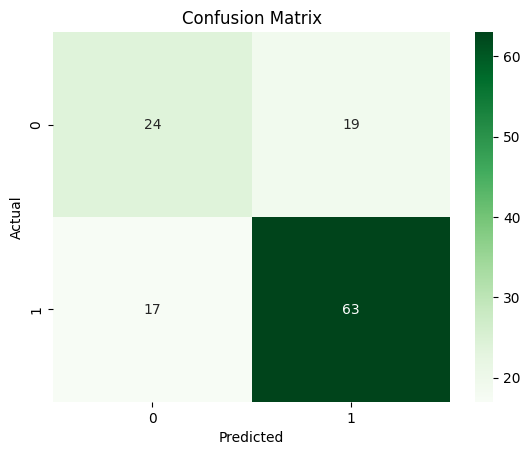

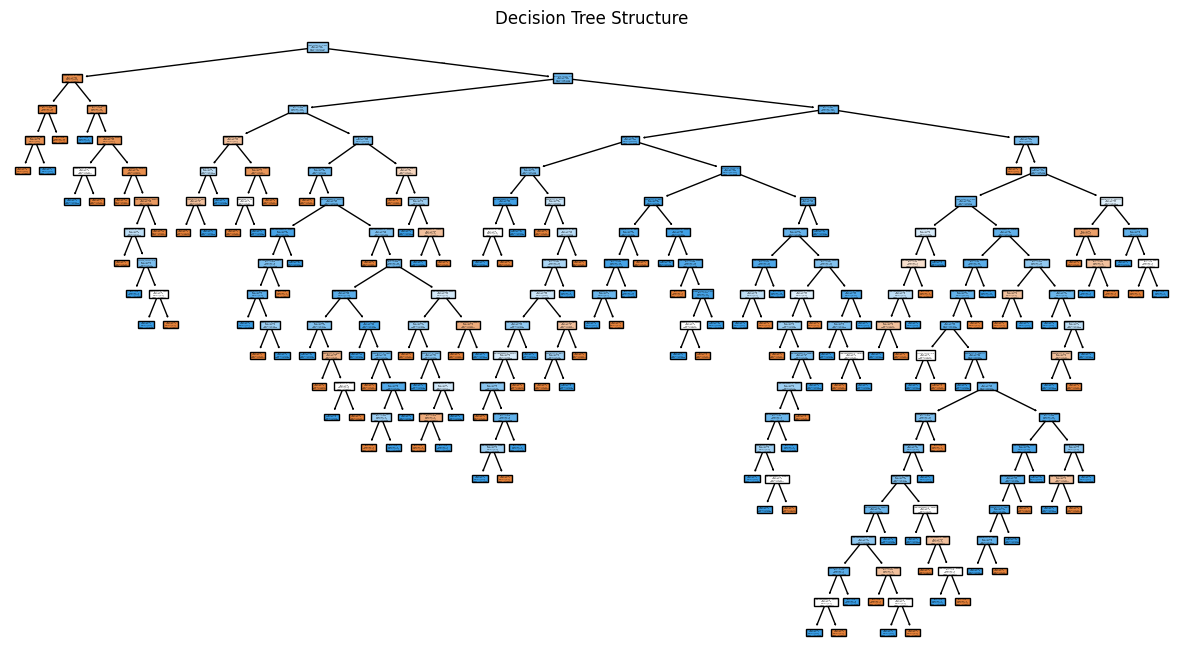

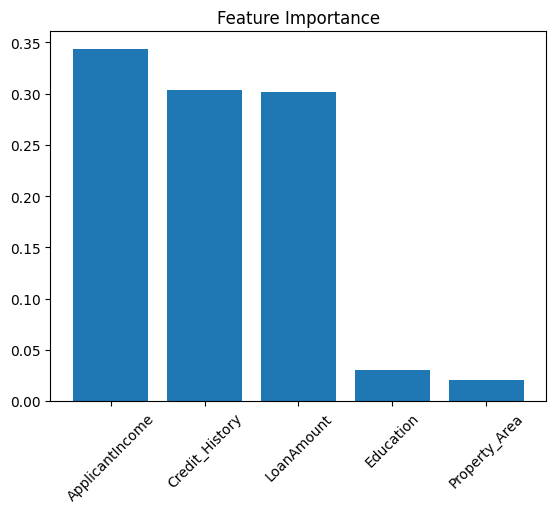

In [4]:
#from google.colab import files
#uploaded=files.upload()

# 24BAD128-Exp 5-Scenario 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("24BAD128-Exp 5-Scenario 2")

df = pd.read_csv(r"train_u6lujuX_CVtuZ9i (1).csv")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df[['ApplicantIncome',
        'LoanAmount',
        'Credit_History',
        'Education',
        'Property_Area']]

y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importance = dt.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print("\nTraining Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)

shallow_tree.fit(X_train, y_train)
deep_tree.fit(X_train, y_train)

print("\nShallow Tree Accuracy:",
      accuracy_score(y_test, shallow_tree.predict(X_test)))

print("Deep Tree Accuracy:",
      accuracy_score(y_test, deep_tree.predict(X_test)))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(15,8))
plot_tree(dt,
          feature_names=X.columns,
          class_names=["Rejected","Approved"],
          filled=True)
plt.title("Decision Tree Structure")
plt.show()

plt.figure()
plt.bar(feature_importance['Feature'],
        feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()
